In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline

In [5]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))

def parse_mdtest(files):
    r = []
    for fname in sorted(files):
        with open(fname) as f:
            data = json.load(f)
            for client in data['results']:
                for line in client['stdout_lines']:
                    if "started" in line: start = line.split()[4]
                    if "finished" in line: end = line.split()[4]            
                r.append(to_seconds(end) - to_seconds(start))
    return r

def parse_delta(files):
    r = []
    o = []
    for fname in sorted(files):
        with open(fname) as f:
            data = json.load(f)       
            r.append(to_seconds(data['delta']))
            try:
                o.append(float(data['stdout']))
            except:
                o.append(0)
    return r, o

,job,mean,std
0,No\nJournal,1.0,0.032575
1,30,NaN,NaN
2,60,NaN,NaN
3,90,NaN,NaN
4,120,NaN,NaN
5,150,NaN,NaN
6,180,NaN,NaN


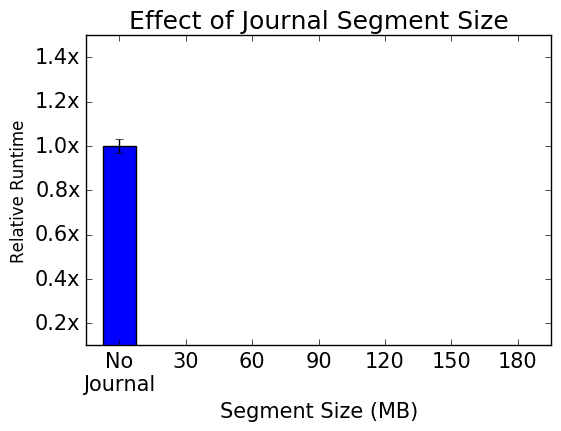

In [7]:
# baseline: creates without journal
df = pd.DataFrame(columns=["job", "mean", "std"])
s = "../results-done/nojournal-cache/"
d = parse_mdtest(glob.glob(s + 'mdtest-100000-*'))
mean = np.mean(d)
d = d/mean
df.loc[len(df)] = ['No\nJournal', np.mean(d), np.std(d)]

# data: get normalized values
for site in ["30", "60", "90", "120", "150", "180"]:
    s = 'experiments/kernel/journal/results/journal' + site + '-cache/'
    d = parse_mdtest(glob.glob(s + 'mdtest-100000-*'))
    d = d/mean
    df.loc[len(df)] = [site.replace('-', '\n'), np.mean(d), np.std(d)]
df

# plot
fig, ax = plt.subplots(1, 1)
df.plot.bar(ax=ax, y='mean', yerr='std')
ax.set_xticklabels(df['job'], rotation=0)
ax.legend().remove()
ax.set_title("Effect of Journal Segment Size")
ax.set_ylabel("Relative Runtime", fontsize=12)
ax.set_ylim(0, 1.5)
ax.set_xlabel("Segment Size (MB)")
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}x'.format(x) for x in vals])
ax.set_ylim(0.1)

font = {'size'   : 15}
matplotlib.rc('font', **font)

df
#fig.savefig('paper/graphs/slowdown-journal.png', bbox_inches='tight', dpi=400)